# Pocking at Ever Larger Language Models
## An introduction for (digital) humanists



## Introduction 

## Download data

In [1]:
!wget -O animacy.zip https://bl.iro.bl.uk/downloads/59a8c52f-e0a5-4432-9897-0db8c067627c

--2023-04-26 17:01:10--  https://bl.iro.bl.uk/downloads/59a8c52f-e0a5-4432-9897-0db8c067627c
Resolving bl.iro.bl.uk (bl.iro.bl.uk)... 52.211.187.46, 52.209.26.210, 18.202.144.94
Connecting to bl.iro.bl.uk (bl.iro.bl.uk)|52.211.187.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144694 (141K) [application/zip]
Saving to: ‘animacy.zip’

animacy.zip         100%[===================>] 141.30K  --.-KB/s    in 0.05s   

2023-04-26 17:01:10 (2.77 MB/s) - ‘animacy.zip’ saved [144694/144694]



In [ ]:
#!wget -O requirements.txt https://raw.githubusercontent.com/kasparvonbeelen/SAS-LLM-Worshop/main/requirements.txt

In [51]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 8.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 7.6 MB/s eta 0:00:00


In [2]:
!unzip animacy.zip -d animacy_data

Archive:  animacy.zip
  inflating: animacy_data/LwM-nlp-animacy-annotations-machines19thC.tsv  
  inflating: animacy_data/read-me    


In [3]:
!ls

LICENSE            SAS-Workshop.ipynb animacy_data
README.md          animacy.zip


## From mini to somewhat larger

... but not large

Statistical Language Model

Predict and sample

### A Shakespeare language model

In [35]:
import numpy as np
import requests
from collections import Counter
import re
import pandas as pd

In [152]:
text = requests.get('https://www.gutenberg.org/cache/epub/100/pg100.txt').text.lower().strip()
text = requests.get('https://programminghistorian.org/assets/interrogating-national-narrative-gpt/articles.txt').text.lower().strip()


In [153]:
text[:100]

"uk opposition parties have agreed not to back boris johnson's demand for a general election before t"

In [167]:
pattern = re.compile('\w+')
tokens = pattern.findall(text)

In [168]:
print(tokens[:50])

['uk', 'opposition', 'parties', 'have', 'agreed', 'not', 'to', 'back', 'boris', 'johnson', 's', 'demand', 'for', 'a', 'general', 'election', 'before', 'the', 'eu', 'summit', 'in', 'mid', 'october', 'labour', 'the', 'lib', 'dems', 'the', 'snp', 'and', 'plaid', 'cymru', 'say', 'they', 'will', 'vote', 'against', 'the', 'government', 'or', 'abstain', 'in', 'monday', 's', 'vote', 'on', 'whether', 'to', 'hold', 'a']


In [169]:
def ngrams(tokens: list,n: int=2):
    """
    Arguments:
        text
        n
    Returns:
        
    """
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens))]

bigrams = ngrams(tokens,2)

In [170]:
bigrams[:10]

['uk opposition',
 'opposition parties',
 'parties have',
 'have agreed',
 'agreed not',
 'not to',
 'to back',
 'back boris',
 'boris johnson',
 'johnson s']

In [171]:
bigrams = Counter(bigrams)

In [172]:
trigrams = Counter(ngrams(tokens,3))

In [173]:
trigrams.most_common(10)

[('the prime minister', 5227),
 ('a no deal', 3301),
 ('with the eu', 2890),
 ('no deal brexit', 2392),
 ('the uk s', 2001),
 ('the european union', 1983),
 ('of the eu', 1886),
 ('leave the eu', 1811),
 ('the eu s', 1679),
 ('to leave the', 1657)]

In [174]:
tetragram = Counter(ngrams(tokens,4))

In [175]:
tetragram.most_common(10)

[('a no deal brexit', 2133),
 ('to leave the eu', 1168),
 ('the prime minister s', 1075),
 ('the house of commons', 888),
 ('last modified on mon', 866),
 ('modified on mon 3', 860),
 ('on mon 3 feb', 860),
 ('mon 3 feb 2020', 860),
 ('the rest of the', 676),
 ('of a no deal', 634)]

In [176]:
vocabulary = set(tokens)
len(vocabulary)

39922

In [177]:
#sequence = 'the duke of'
sequence = 'a no deal'
prob_next_word = Counter({w: tetragram[f'{sequence} {w}'] / trigrams[sequence] for w in vocabulary})

In [178]:
prob_next_word.most_common(20)

[('brexit', 0.64616782793093),
 ('exit', 0.07906694940926992),
 ('scenario', 0.06846410178733717),
 ('outcome', 0.028476219327476522),
 ('departure', 0.016964556195092396),
 ('and', 0.0069675855801272345),
 ('the', 0.006664647076643442),
 ('situation', 0.005755831566192063),
 ('would', 0.005755831566192063),
 ('or', 0.00545289306270827),
 ('split', 0.004847016055740685),
 ('crash', 0.004241139048773099),
 ('he', 0.004241139048773099),
 ('is', 0.003938200545289306),
 ('on', 0.003938200545289306),
 ('but', 0.0036352620418055137),
 ('in', 0.003332323538321721),
 ('it', 0.003332323538321721),
 ('divorce', 0.003332323538321721),
 ('withdrawal', 0.002726446531354135)]

In [179]:
df_prob = pd.DataFrame(list(prob_next_word.most_common(20)),columns=['token','prob'])
df_prob.index = list(df_prob["token"])

<Axes: title={'center': 'probability of next word'}>

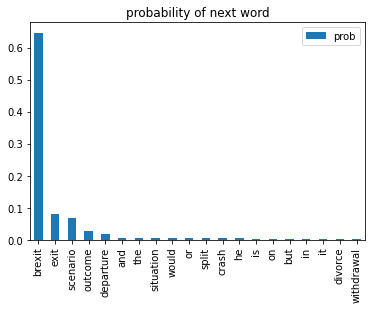

In [180]:
df_prob.plot(kind='bar', title='probability of next word')

In [181]:
words, probs = list(prob_next_word),list(prob_next_word.values())

In [182]:
np.random.choice(words, p=probs)

'scenario'

In [183]:
sequence += ' ' + np.random.choice(words, p=probs)
sequence

'a no deal brexit'

In [187]:
total_sequence = 'a no deal'
print(total_sequence)
sequence = total_sequence
for _ in range(200):
    prob_next_word = Counter({w: tetragram[f'{sequence} {w}'] / trigrams[sequence] for w in vocabulary})
    words, probs = list(prob_next_word),list(prob_next_word.values())
    total_sequence += ' ' + np.random.choice(words, p=probs)
    sequence = ' '.join(total_sequence.split()[-3:])
print(total_sequence)

a no deal
a no deal brexit the tory hardline brexiters are now zipping their lips they have concluded that boris johnson s pledge to make its agreement to any deal which included the controversial northern ireland backstop how to avoid new border checks for eu nationals to enter its territory and claim certain benefits there as swiss nationals can do in his conference speech today with what sounded like envy but it is a coherent and functioning statute book on the eu negotiations before june s summit of eu leaders the eu is always a five past midnight affairs as eurocrats wait until the end of march but mrs may decided for the second day of mr trump were leaked to a newspaper article saying they would prefer no brexit at all the longer the argument plays out the softer the brexit provided britain stays in the single market by remaining in a customs union with the eu was delighted with the agreement and the uk if some of our proposals for a fantastical heath robinson customs arrangement

## Predict the next word with gpt-2

https://jamesmccaffrey.wordpress.com/2021/10/21/a-predict-next-word-example-using-hugging-face-and-gpt-2/

In [106]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

toker = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

In [188]:
seq = "A no deal"


inpts = toker(seq, return_tensors="pt")

In [189]:
inpts

{'input_ids': tensor([[  32,  645, 1730]]), 'attention_mask': tensor([[1, 1, 1]])}

In [190]:
with torch.no_grad():
    logits = model(**inpts).logits[:, -1, :]

In [191]:
logits.shape

torch.Size([1, 50257])

In [192]:
import torch.nn.functional as F
probabilities = F.softmax(logits, dim=-1)

In [193]:
probabilities

tensor([[9.0731e-03, 3.7448e-03, 1.1571e-05,  ..., 5.9400e-08, 6.4343e-08,
         2.9878e-04]])

In [194]:
pred_id = torch.argmax(logits).item()
print("\nPredicted token ID of next word: ")
print(pred_id)

pred_word = toker.decode(pred_id)


Predicted token ID of next word: 
13


In [195]:
print(pred_word)

.


## Text Generation

In [48]:
#https://huggingface.co/blog/how-to-generate

In [196]:
sequence = 'the duke of'
sequence = 'A no deal Brexit'

In [197]:
from transformers import pipeline
generator = pipeline('text-generation', model = 'gpt2')
generator(sequence, max_length = 30, num_return_sequences=3)

/Users/kasparbeelen/anaconda3/envs/sas-llm/lib/python3.9/site-packages/transformers/generation/utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "A no deal Brexit would require further concessions on the EU's terms. In other words, UK citizens would not be given a European passport.\n\n"},
 {'generated_text': "A no deal Brexit would not create a 'factory for Brexit', as the EU chief European negotiator has said. It would open the door for negotiations"},
 {'generated_text': 'A no deal Brexit could threaten growth of up to 1% for many years.\n\nIn an analysis of the report which the government has given to'}]

In [301]:
#help(GPT2LMHeadModel)

In [199]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Model


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = GPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

In [200]:
model2 = GPT2Model.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

In [201]:
input_ids = tokenizer.encode(sequence, return_tensors='pt')


In [202]:
input_ids

tensor([[   32,   645,  1730, 11435]])

In [203]:
predictions = model(**tokenizer(sequence, return_tensors='pt'))

In [204]:
predictions.logits.shape

torch.Size([1, 4, 50257])

In [205]:
tokenizer.decode(np.argmax(predictions.logits[0,-1,:].detach().numpy()))

' would'

In [206]:
greedy_output = model.generate(input_ids, max_length=50)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
A no deal Brexit would be a disaster for the UK, but for the EU as a whole.

"The UK is a member of the European Union, and we are not going to be able to leave the EU without the EU's help


# Fine-tuning a GPT-2 Model

https://colab.research.google.com/drive/13dZVYEOMhXhkXWfvSMVM1TTtUDrT6Aeh?usp=sharing

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Model, AutoModelForCausalLM
import requests
import pandas as pd
from datasets import Dataset
from transformers import TrainingArguments
from transformers import Trainer

In [286]:
text = requests.get('https://programminghistorian.org/assets/interrogating-national-narrative-gpt/articles.txt'
                       ).text.lower().strip().split('\n')



In [293]:
df_text = pd.DataFrame(text,columns=['text'])

In [294]:
brexit_dataset = Dataset.from_pandas(df_text)

In [290]:
from transformers import DataCollatorForLanguageModeling
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', 
                                           truncation=True, 
                                           max_length=768, 
                                          bos_token='<|startoftext|>', 
                                          eos_token='<|endoftext|>', 
                                          pad_token='<|pad|>') #gpt2-medium

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [295]:
def tokenize_function(examples):
    result = tokenizer(examples["text"])
    if tokenizer.is_fast:
        result["word_ids"] = [result.word_ids(i) for i in range(len(result["input_ids"]))]
    return result


# Use batched=True to activate fast multithreading!
tokenized_datasets = brexit_dataset.map(
        tokenize_function, batched=True, remove_columns=["text"]
)
tokenized_datasets

Map:   0%|          | 0/130566 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 130566
})

In [297]:
train_size = int(len(tokenized_datasets) *.9)
test_size = int(len(tokenized_datasets) *.1)
print(train_size,test_size)
dataset = tokenized_datasets.train_test_split(
    train_size=train_size, test_size=test_size, seed=42
)
dataset

117509 13056


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 117509
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 13056
    })
})

In [298]:
from transformers import TrainingArguments

#training_args = TrainingArguments("test-trainer")
model_checkpoint = 'gpt-2'
batch_size = 64
# Show the training loss with every epoch
logging_steps = len(dataset["train"]) // batch_size
model_name = model_checkpoint.split("/")[-1]

training_args = TrainingArguments(
    output_dir=f"gpt-finetuned",
    overwrite_output_dir=True,
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    #push_to_hub=True,
    #fp16=True,
    logging_steps=logging_steps,
)

In [ ]:
model = AutoModelForCausalLM.from_pretrained("gpt2")

In [299]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [300]:
trainer.train()

/Users/kasparbeelen/anaconda3/envs/sas-llm/lib/python3.9/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

# Few shot leaning